Want to dive right in? [Download Notebook](https://github.com/easierdata/EASIER-WEBSITE-V3/blob/main/notebooks/NDVI_STAC_IPFS.ipynb)


## Introduction
In this blog post, we will introduce you to a decentralized peer-to-peer hypermedia protocol called IPFS, which can revolutionize how you handle large datasets, such as satellite imagery, for tasks like object detection and land cover classification. With its content-addressing and decentralized architecture, IPFS makes it easier to share and distribute data across a network of nodes.

For this post, we will be showcasing IPFS through the classic and timeless Normalized Difference Vegetation Index (NDVI) analysis of Landsat 9 imagery. This example is an excellent illustration of how IPFS can be used to handle geospatial data, from fetching imagery to publishing a geospatial analysis.

So, whether you're a seasoned geospatial professional or just starting, this blog post is perfect for you. Get ready to revolutionize your geospatial analyses with IPFS!

## What is IPFS?
IPFS, or InterPlanetary File System, is a peer-to-peer network protocol designed to create a decentralized and distributed web. It allows users to store and access content in a content-addressed manner, which means that the address of the content is derived from the content itself, rather than relying on a centralized server. This makes IPFS highly resilient to censorship, data loss, and other forms of centralization.

In addition, IPFS is a peer-to-peer network, meaning that data is stored and shared across multiple nodes in the network. When you query the IPFS network for a piece of content, the network returns the content from the node that is closest to you¹, resulting in faster data access and reduced load on any single node.

In this tutorial, we will not only explore how to use IPFS to fetch Landsat imagery and publish a geospatial analysis, but we'll also be setting up our own IPFS node. This allows our computer to fetch from IPFS and, if you choose, participate in the network to make the data more available for everyone.

## Advantages of Using IPFS for Geospatial Workflows
Traditionally, geospatial workflows have relied on centralized storage systems such as cloud storage providers or local file systems. However, these systems have limitations in terms of scalability, security, and availability. By contrast, IPFS provides several advantages for geospatial workflows:
1. Content-addressing
2. Decentralization
3. Censorship Resistance

### Content-addressing: 
IPFS uses content-addressing, which means that the content itself is used to derive its address. This ensures that the data is tamper-proof and verifiable, and also allows for highly efficient data retrieval.

### Decentralization: 
IPFS is a peer-to-peer network, which means that data is stored and shared across multiple nodes in the network. This ensures that the data is highly available and geographically distributed.

### Censorship Resistance:
Data is stored and shared across multiple nodes in the network. This ensures that the data is highly available and resilient to data loss or censorship.

## How to Calculate NDVI on Landsat 9 Imagery Using IPFS - Step-by-Step Guide
Now that we understand the advantages of using IPFS, let's see how we can calculate NDVI on Landsat 9 imagery using IPFS in a Jupyter notebook. We will be using several libraries such as rasterio, matplotlib, and pystac_client.


### Environment Setup
1 - [Install IPFS Kubo CLI](https://docs.ipfs.io/install/ipfs-kubo/) (if you haven't already). This will allow you to run an IPFS node on your local machine.

2 - [Set up a Jupyter Notebook environment](https://www.youtube.com/watch?v=DA6ZAHBPF1U). A convenient method for achieving this is by utilizing the Jupyter integration in Visual Studio Code.

### Initilize your IPFS node and start the daemon.
This will allow you to fetch data from IPFS. You can do this by running the following commands in your terminal:

In [ ]:
ipfs version
> ipfs version 0.10.0
ipfs init # THis will initialize your IPFS node and create your PeerID
ipfs daemon # This will start the IPFS daemon. Leave this running in the background.

### Install Python Libraries
First, we need to install the required libraries. I reccomend using a virtual environment to install the Python libraries. Here is the [requirements.txt](requirements.txt) file I used for this tutorial.

In [ ]:
# Run this in the terminal to install the required packages.
python3 -m venv venv # create virtual environment
source venv/bin/activate
pip install -r requirements.txt

### Import Python Libraries


In [2]:
# Standard library imports
from io import BytesIO

# Third-party library imports
import geopandas as gpd
from matplotlib import colors, colormaps
import matplotlib.pyplot as plt
from dateutil.parser import isoparse
from PIL import Image as pil_image
from ipfs_stac import client
import numpy as np


### Initiaize Web3 Client

In [3]:
my_client = client.Web3(stac_endpoint="http://ec2-54-172-212-55.compute-1.amazonaws.com/api/v1/pgstac/", local_gateway="127.0.0.1")
data = my_client.getFromCID("QmZ4tDuvesekSs4qM5ZBKpXiZGun7S2CYtEZRB3DYXkjGx")
print(data)

b'hello worlds\n'


### How did we set up the STAC API?
Before we continue with the steps to connect to the STAC API and search for Landsat 9 imagery from the Washington D.C. area, it's worth mentioning that we have set up a STAC server ourselves and populated it with IPFS CIDs for the Landsat 9 dataset. As a proof of concept, there are only 5 landsat scenes currently on the STAC server. To learn more about the technique we used for this process, you can refer to this blog post: [A New Way to Reference and Retrieve Geographic Data](https://easierdata.org/updates/2022/2022-12-02-a-new-way-to-reference-and-retrieve-geographic-data).

If you're interested in setting up your own STAC server and populating it with IPFS CIDs, you can follow the steps outlined in our [stac-fastapi GitHub repository fork](https://github.com/easierdata/stac-fastapi).

With that background, let's continue with connecting to our STAC API and searching for Landsat 9 imagery from the Washington D.C. area:

### Explore our STAC Catalog with GeoPandas and the ipfs-stac packages
For demo purposes, we have populated the STAC server with a small subset of Landsat 9 imagery. In order to effortless work with STAC and IPFs, our team has developed the [ipfs-stac](https://github.com/easierdata/ipfs-stac) package which is included in the requirements.txt file.

Before running the following code cells, ensure you have started the IPFS daemon by either using the IPFS desktop application or running `ipfs daemon` in the terminal.

In [4]:
bbox = [-76.964657, 38.978967, -76.928008, 39.002783] 
items = my_client.searchSTACByBox(bbox,"landsat-c2l1")


df = gpd.GeoDataFrame.from_features(items.to_dict(), crs="epsg:4326")

df.explore()

### Fetch Landsat Scene from Washington D.C. Area (Or somewhere else!)
The following code connects to our STAC API instance and searches for Landsat 9 imagery by submitting a bounding box query to the STAC server. The STAC server returns a list of Landsat 9 scenes that intersect with the bounding box. Our STAC server only has ~10 scenes, so most bounding boxes will only return a single scene.

In [3]:
# Washington, DC
#bbox = [-76.964657, 38.978967, -76.928008, 39.002783] 

# Taj Mahal, India
# bbox = [78.039957, 27.164888, 78.045247, 27.175254]

# Christ the Redeemer, Rio de Janeiro, Brazil
# bbox = [-43.210297, -22.951625, -43.207670, -22.948875]

# Great Wall Of China (Note: The wall is more than 13,000 miles long, and the bounding box only covers a small portion of it. Here's a bounding box for the Badaling section near Beijing)
#bbox = [116.056298, 40.338204, 116.058715, 40.343322]

# Petra, Jordan
# bbox = [35.442749, 30.322058, 35.472730, 30.342304]

# Machu Picchu, Peru
# bbox = [-72.544959, -13.165088, -72.530122, -13.155547]

# Chichen Itza, Mexico
# bbox = [-88.570015, 20.682207, -88.568230, 20.684936]

# Colosseum, Rome, Italy
bbox = [12.490827, 41.889249, 12.494162, 41.891876]


item = my_client.searchSTACByBox(bbox, "landsat-c2l1")[0]
properties = item.properties
print(f"This satellite image was taken by the {properties['platform']} platform on {isoparse(properties['datetime']):%c}. \n\
The image covers an area with a bounding box of {item.bbox}. \n\
The image has a resolution of {properties['proj:shape']} pixels and uses the EPSG:{properties['proj:epsg']} coordinate reference system. \n\
The percentage of cloud cover in the image is {properties['eo:cloud_cover']}% over the entire image.")
# Uncomment the line below to see the full metadata for the item
#item 

This satellite image was taken by the LANDSAT_9 platform on Wed Feb  2 09:53:39 2022. 
The image covers an area with a bounding box of [10.722394904433058, 40.69369269987787, 13.472045876637816, 42.80903201136925]. 
The image has a resolution of [8031, 7931] pixels and uses the EPSG:32633 coordinate reference system. 
The percentage of cloud cover in the image is 2.4% over the entire image.


### Fetch bands 4 and 5 from IPFS (Red and NIR)

In [4]:
red_band = my_client.getAssetFromItem(item, "red")
nir_band = my_client.getAssetFromItem(item, "nir08")

print(f"Red band CID: {red_band}")
print(f"NIR band CID: {nir_band}")

Fetching QmXyXkdvj7spdfyFTtdq6PGHo7QFK8YcJCQHeJC88CXwHa
Fetching QmcD4krqqBEN2KCtdebeUP9VQXjKxu9mJbDo8retBjbDEV
Red band CID: QmXyXkdvj7spdfyFTtdq6PGHo7QFK8YcJCQHeJC88CXwHa
NIR band CID: QmcD4krqqBEN2KCtdebeUP9VQXjKxu9mJbDo8retBjbDEV


### Download Assets from IPFS and transform the image an NP array
This could take awhile depending on your internet connection and the number of IPFS peers you are connected to.

In [5]:
red_band_np = red_band.to_np_ndarray()
nir_band_np = nir_band.to_np_ndarray()

### Calculate NDVI
Now, we can calculate the NDVI using the loaded numpy arrays. The forumula we are using for NDVI is straight from the [USGS website](https://www.usgs.gov/core-science-systems/nli/landsat/landsat-normalized-difference-vegetation-index?qt-science_support_page_related_con=0#qt-science_support_page_related_con). We will also add a small value to the denominator to avoid divide by zero errors because there is a chance that the red and NIR bands will have the same value in a given pixel.

In [6]:
eps = 0.0001 # Avoid divide by zero errors
ndvi = (nir_band_np - red_band_np) / (nir_band_np + red_band_np + eps)

### Plot NDVI
With the NDVI calculated, we can plot the NDVI image using matplotlib.

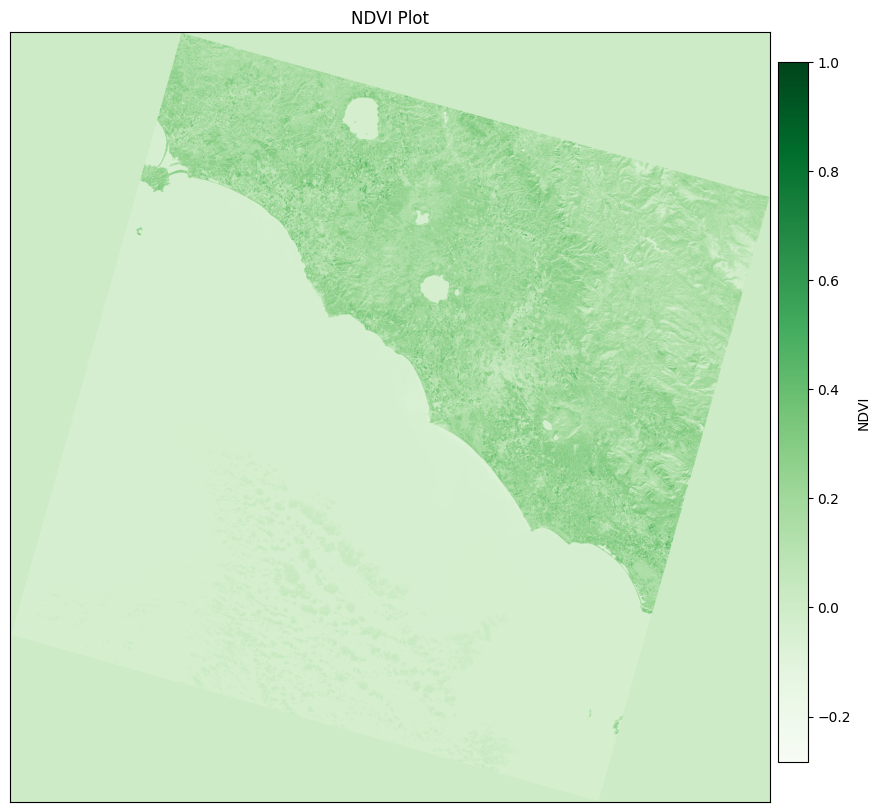

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))

# Remove the axes
ax.set_xticks([])
ax.set_yticks([])

# Set the color map to the min and max values of NDVI
ndvi_min, ndvi_max = np.min(ndvi), np.max(ndvi)
norm = colors.Normalize(vmin=ndvi_min, vmax=ndvi_max)

# Use the normalization object for the image and the color map
green_color_map = colormaps["Greens"]
green_ndvi = green_color_map(norm(ndvi))

img = ax.imshow(green_ndvi)
ax.set_title("NDVI Plot")

cax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
cb = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=green_color_map), cax=cax, orientation='vertical')
cb.set_label("NDVI")

plt.show()

### Add plot image to IPFS
Now, let's add the plot to our local IPFS node! In order to do that, we need to save this plot as bytes and then we can use `myclient_add_bytes_to_ipfs` to add the bytes to IPFS. This function will return the IPFS CID for the image.

In [11]:
def save_plot_to_buffer(plot: plt.Figure) -> bytes:
    buffer = BytesIO()
    plot.savefig(buffer, format='jpeg')
    buffer.seek(0)
    return buffer.getvalue()

plot_buffer = save_plot_to_buffer(fig)
plot_cid = my_client.uploadToIPFS(bytes_data=plot_buffer)
print(f"Plot CID: {plot_cid}")

Plot CID: QmXpp3j5jMCAhqsfqLVD3RZ9QE6BsGLAxnfr3z1rdZzNkF


### Fetch plot image from IPFS and display it
Now that we have the plot saved to IPFS, we can fetch it from our local node using the CID hash. We can then display the image using matplotlib.

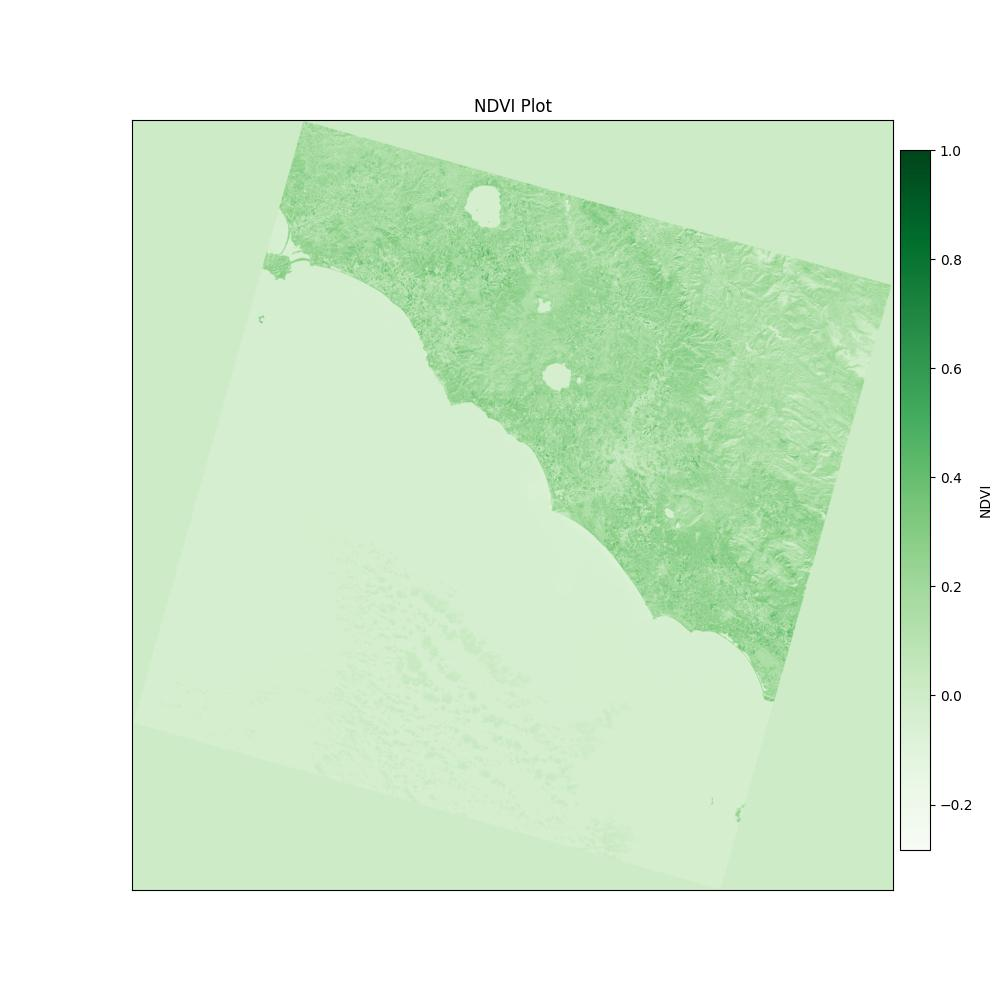

In [12]:
plot_image = my_client.getFromCID(plot_cid)
img = pil_image.open(BytesIO(plot_image))
display(img)

## Conclusion
In this blog post, we demonstrated how to calculate NDVI on Landsat 9 imagery using IPFS in a Jupyter notebook. By leveraging IPFS in place of traditional storage systems, we can benefit from content-addressing and decentralization. These features lead to faster data access, improved data persistence, and more efficient storage, highlighting the potential of IPFS in geospatial workflows.

## Bonus - Want to make the data even more accessible?
If you would like to make the dataset we used in this tutorial more accessible, you can add the two landsat bands to your IPFS node as well. This will allow others to fetch the data from your IPFS node, which will improve the availability of the data. After pinning the data to our local IPFS node, we can fetch it from any IPFS node worldwide using the same commands as before. However, keep in mind that download speeds will be influenced by the distance between your computer and the requester's location, as well as the internet connection speeds for both parties.


To do this, you can use the following code:

In [13]:
red_band.pin()
nir_band.pin()

Data pinned successfully
Data pinned successfully


You can use the `client.pinned_list()` command to confirm that the two Landsat bands and the plot have been added to your IPFS node. By pinning the data, you have made it accessible to the IPFS network, allowing others to access it as well. By sharing this data on IPFS, you are contributing to the open and decentralized web, and making it easier for others to access and use this data. Perhaps the next person following this tutorial will obtain the data from your IPFS node!

In [ ]:
my_client.pinned_list()

## Footnotes
¹ The IPFS node may not actually be the closest node to you. But is simply the one that is most capable of serving the data. This is because IPFS nodes are not required to be online 24/7 and have various levels of bandwidth and storage capacity.